In [1]:
from ultralytics import YOLO
import torch
from matplotlib import pyplot as plt

# Forward Propagation


image 1/1 /home/user/nelson/src/test.png: 480x640 2 bottless, 3.0ms
Speed: 0.6ms preprocess, 3.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


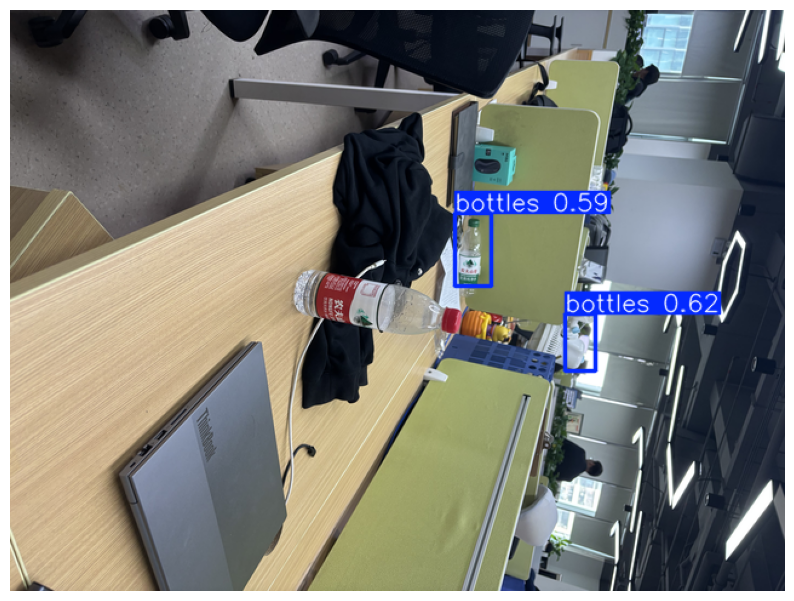

In [ ]:

model = YOLO('runs/detect/train/weights/best.pt')

device_id = 0
device = f'cuda:{device_id}' if torch.cuda.is_available() else 'cpu'

model.to(device)
results = model('test.png', conf=0.5)

for result in results:
    im_array = result.plot()
    
    im_rgb = im_array[..., ::-1] 
    
    plt.figure(figsize=(10, 10))
    plt.imshow(im_rgb)
    plt.axis('off')
    plt.show()

# Training Process

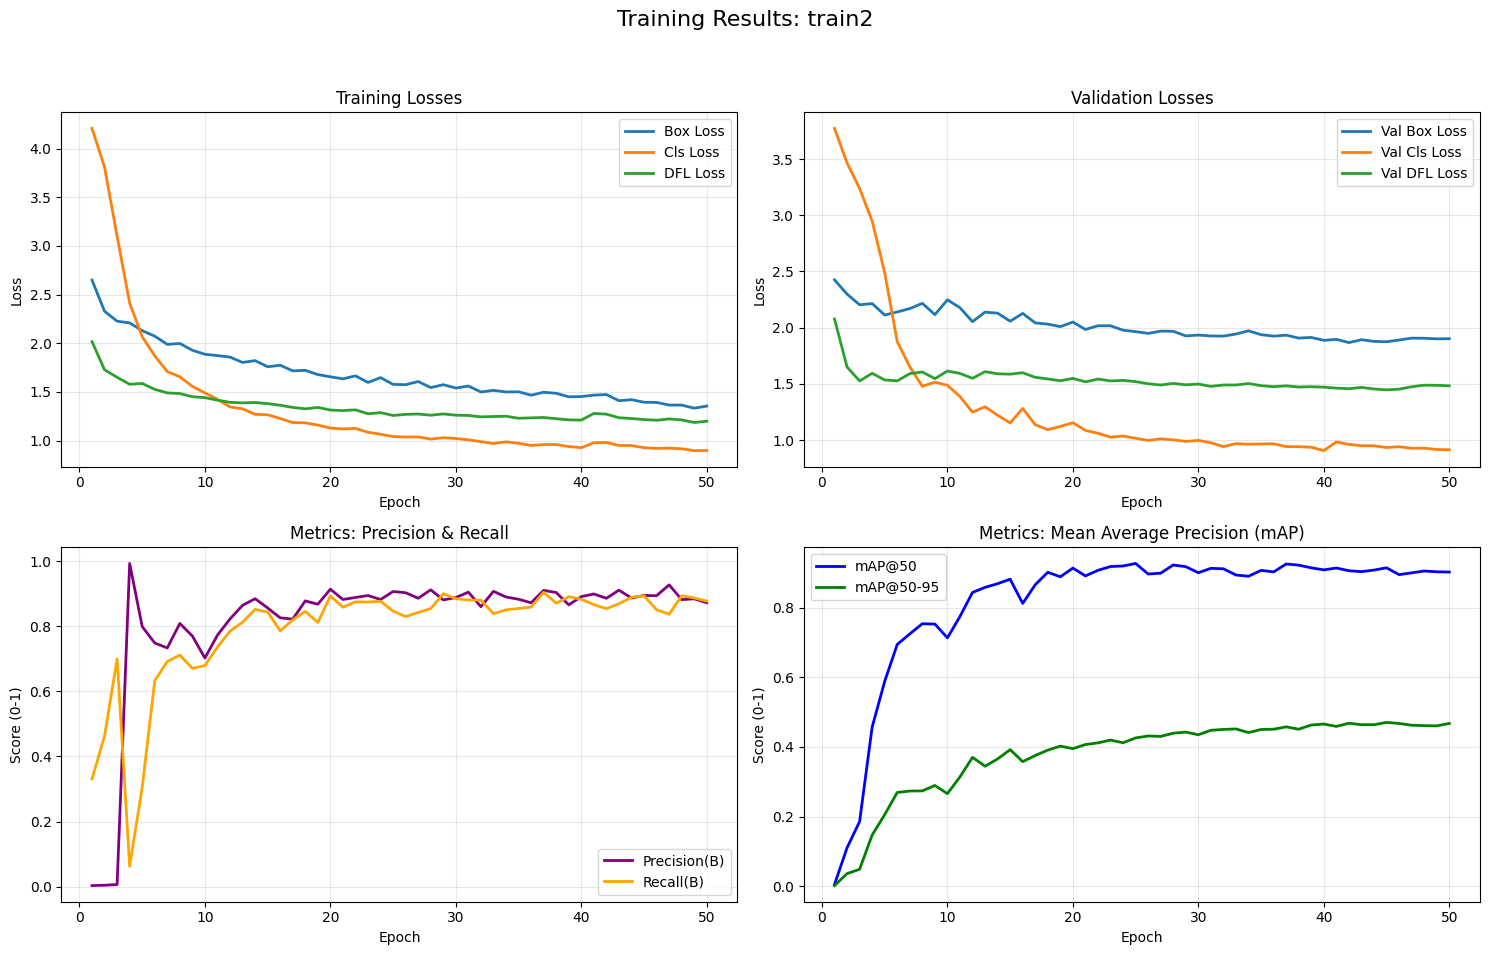

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

csv_path = 'runs/detect/train/results.csv' 

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    df.columns = [c.strip() for c in df.columns]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Training Results: {os.path.basename(os.path.dirname(csv_path))}', fontsize=16)

    # ---  Train Losses  ---
    ax = axes[0, 0]
    ax.plot(df['epoch'], df['train/box_loss'], label='Box Loss', linewidth=2)
    ax.plot(df['epoch'], df['train/cls_loss'], label='Cls Loss', linewidth=2)
    ax.plot(df['epoch'], df['train/dfl_loss'], label='DFL Loss', linewidth=2)
    ax.set_title('Training Losses')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # ---  Val Losses  ---
    ax = axes[0, 1]
    ax.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', linewidth=2)
    ax.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss', linewidth=2)
    ax.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss', linewidth=2)
    ax.set_title('Validation Losses')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # ---  Precision & Recall  ---
    ax = axes[1, 0]
    ax.plot(df['epoch'], df['metrics/precision(B)'], label='Precision(B)', color='purple', linewidth=2)
    ax.plot(df['epoch'], df['metrics/recall(B)'], label='Recall(B)', color='orange', linewidth=2)
    ax.set_title('Metrics: Precision & Recall')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Score (0-1)')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # ---  Mean Average Precision (mAP)  ---
    ax = axes[1, 1]
    ax.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50', color='blue', linewidth=2)
    ax.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95', color='green', linewidth=2)
    ax.set_title('Metrics: Mean Average Precision (mAP)')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Score (0-1)')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

else:
    print(f"error: cannot find file {csv_path}, please check if the path is correct.")